### WeedCrop Image detection - YOLOv8s
This project uses various CNN techniques to classify weed and normal crops<br>
**NOTE- This notebook was run on google collab

In [ ]:
!nvidia-smi

Fri Jan 19 12:33:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
#importing necessary libraries
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/yolo


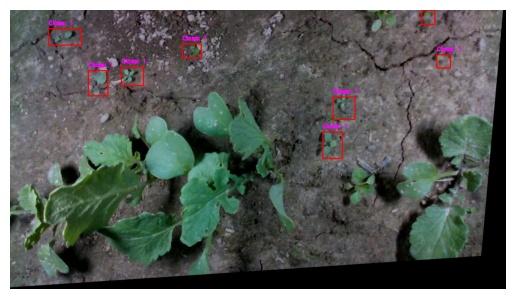

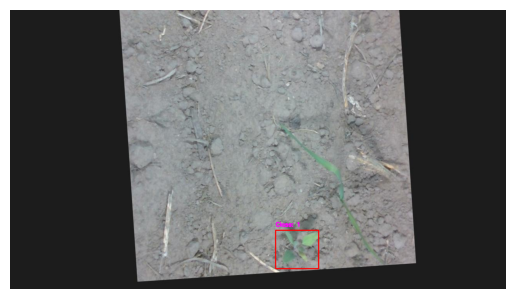

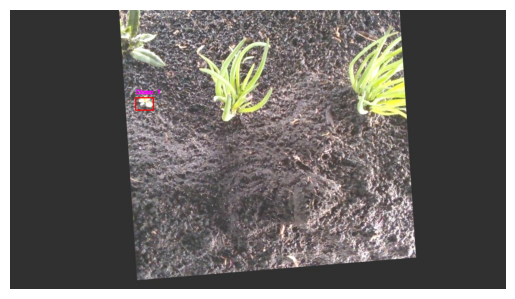

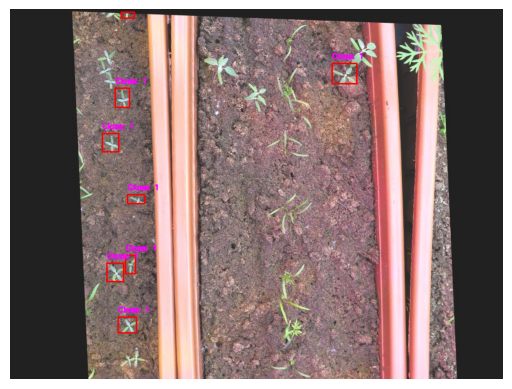

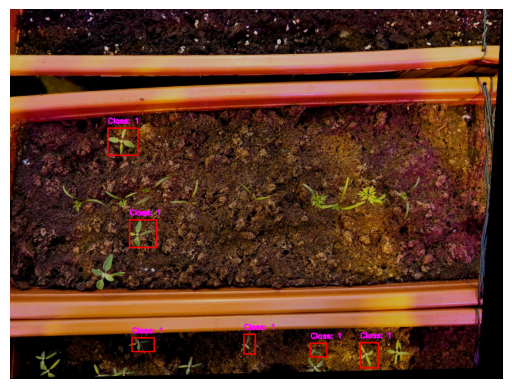

In [1]:
#visualising the dataset
import os
import cv2
import matplotlib.pyplot as plt
import glob
import random

# Path to the folder containing your YOLOv5 dataset images
image_folder = './WeedCrop/train/images'
label_folder = './WeedCrop/train/labels'

# List all image files in the image folder
image_files = glob.glob(os.path.join(image_folder, '*.jpg')) + glob.glob(os.path.join(image_folder, '*.png'))

# Display some random images from the dataset
num_images_to_display = 5
selected_images = random.sample(image_files, num_images_to_display)

# Function to display images with bounding boxes and annotations
def display_image_with_boxes(image_path, label_folder):
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Get the corresponding annotation file path
    label_path = os.path.join(label_folder, os.path.splitext(os.path.basename(image_path))[0] + '.txt')

    # Read the annotation file
    with open(label_path, 'r') as file:
        lines = file.readlines()

    for line in lines:
        # Parse YOLOv5 annotation format (class_id, x_center, y_center, width, height)
        class_id, x_center, y_center, width, height = map(float, line.strip().split())
        
        # Convert YOLOv5 format to OpenCV format (x, y, x+w, y+h)
        x, y, w, h = int((x_center - width / 2) * image.shape[1]), int((y_center - height / 2) * image.shape[0]), int(width * image.shape[1]), int(height * image.shape[0])

        # Draw bounding box
        cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Display annotations
        cv2.putText(image_rgb, f'Class: {int(class_id)}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 255), 2)

    # Display the image with bounding boxes and annotations
    plt.imshow(image_rgb)
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Display images with bounding boxes and annotations
for image_path in selected_images:
    display_image_with_boxes(image_path, label_folder)

## Install YOLOv8
YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

### Initial detection

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/content
100% 6.23M/6.23M [00:00<00:00, 21.6MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 5.08MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 15.8ms
Speed: 0.6ms pre-process, 15.8ms inference, 48.7ms postprocess per image at shape (1, 3, 640, 640)


## Custom Training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/yolo

/content/drive/MyDrive/yolo


In [ ]:
!ls

data.yaml  runs  WeedCrop  yolov8s.pt


In [ ]:
#Training model on custom dataset
##refer the yolov5_dataaset.yaml file , for configuring your own yaml file
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=896 plots=True

[Errno 2] No such file or directory: '/content/drive/MyDrive/My Courses/YOLOv8'
/content/drive/MyDrive/yolo
100% 21.5M/21.5M [00:00<00:00, 155MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=896, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=

### Training results


In [2]:
import pandas as pd

# Replace 'your_excel_file.xlsx' with the actual path to your Excel file
excel_file_path = './images/y8_results.csv'

# Read the Excel file into a pandas DataFrame
df = pd.read_csv(excel_file_path)

# Display the DataFrame as a table
df


,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,0,2.6629,2.9334,1.4572,0.54148,0.53966,0.46213,0.22853,1.8504,1.8561,1.0998,0.070194,0.003312,0.003312
1,1,2.3756,2.1569,1.2826,0.44168,0.54105,0.45517,0.23218,1.8657,1.8290,1.1090,0.039930,0.006382,0.006382
2,2,2.3173,2.0534,1.2619,0.39228,0.42654,0.34805,0.16868,1.9860,1.8276,1.1092,0.009403,0.009188,0.009188
3,3,2.2704,1.9052,1.2333,0.45480,0.53014,0.46974,0.21893,1.9032,1.5624,1.1004,0.008812,0.008812,0.008812
4,4,2.2211,1.8018,1.2234,0.48400,0.57057,0.47468,0.24357,1.8730,1.5303,1.0828,0.008812,0.008812,0.008812
5,5,2.1750,1.7185,1.2040,0.49394,0.59025,0.48565,0.20463,1.9833,1.5445,1.1219,0.008416,0.008416,0.008416
6,6,2.1115,1.6168,1.1862,0.54048,0.60862,0.52951,0.23077,1.9934,1.5242,1.1245,0.008020,0.008020,0.008020
7,7,2.0605,1.5869,1.1681,0.57975,0.58547,0.54619,0.24882,1.8944,1.4657,1.1009,0.007624,0.007624,0.007624
8,8,2.0059,1.4980,1.1488,0.57850,0.59322,0.57198,0.27288,1.8477,1.4101,1.0825,0.007228,0.007228,0.007228
9,9,1.9782,1.4438,1.1382,0.53310,0.55015,0.51581,0.23345,2.1436,1.4143,1.1673,0.006832,0.006832,0.006832


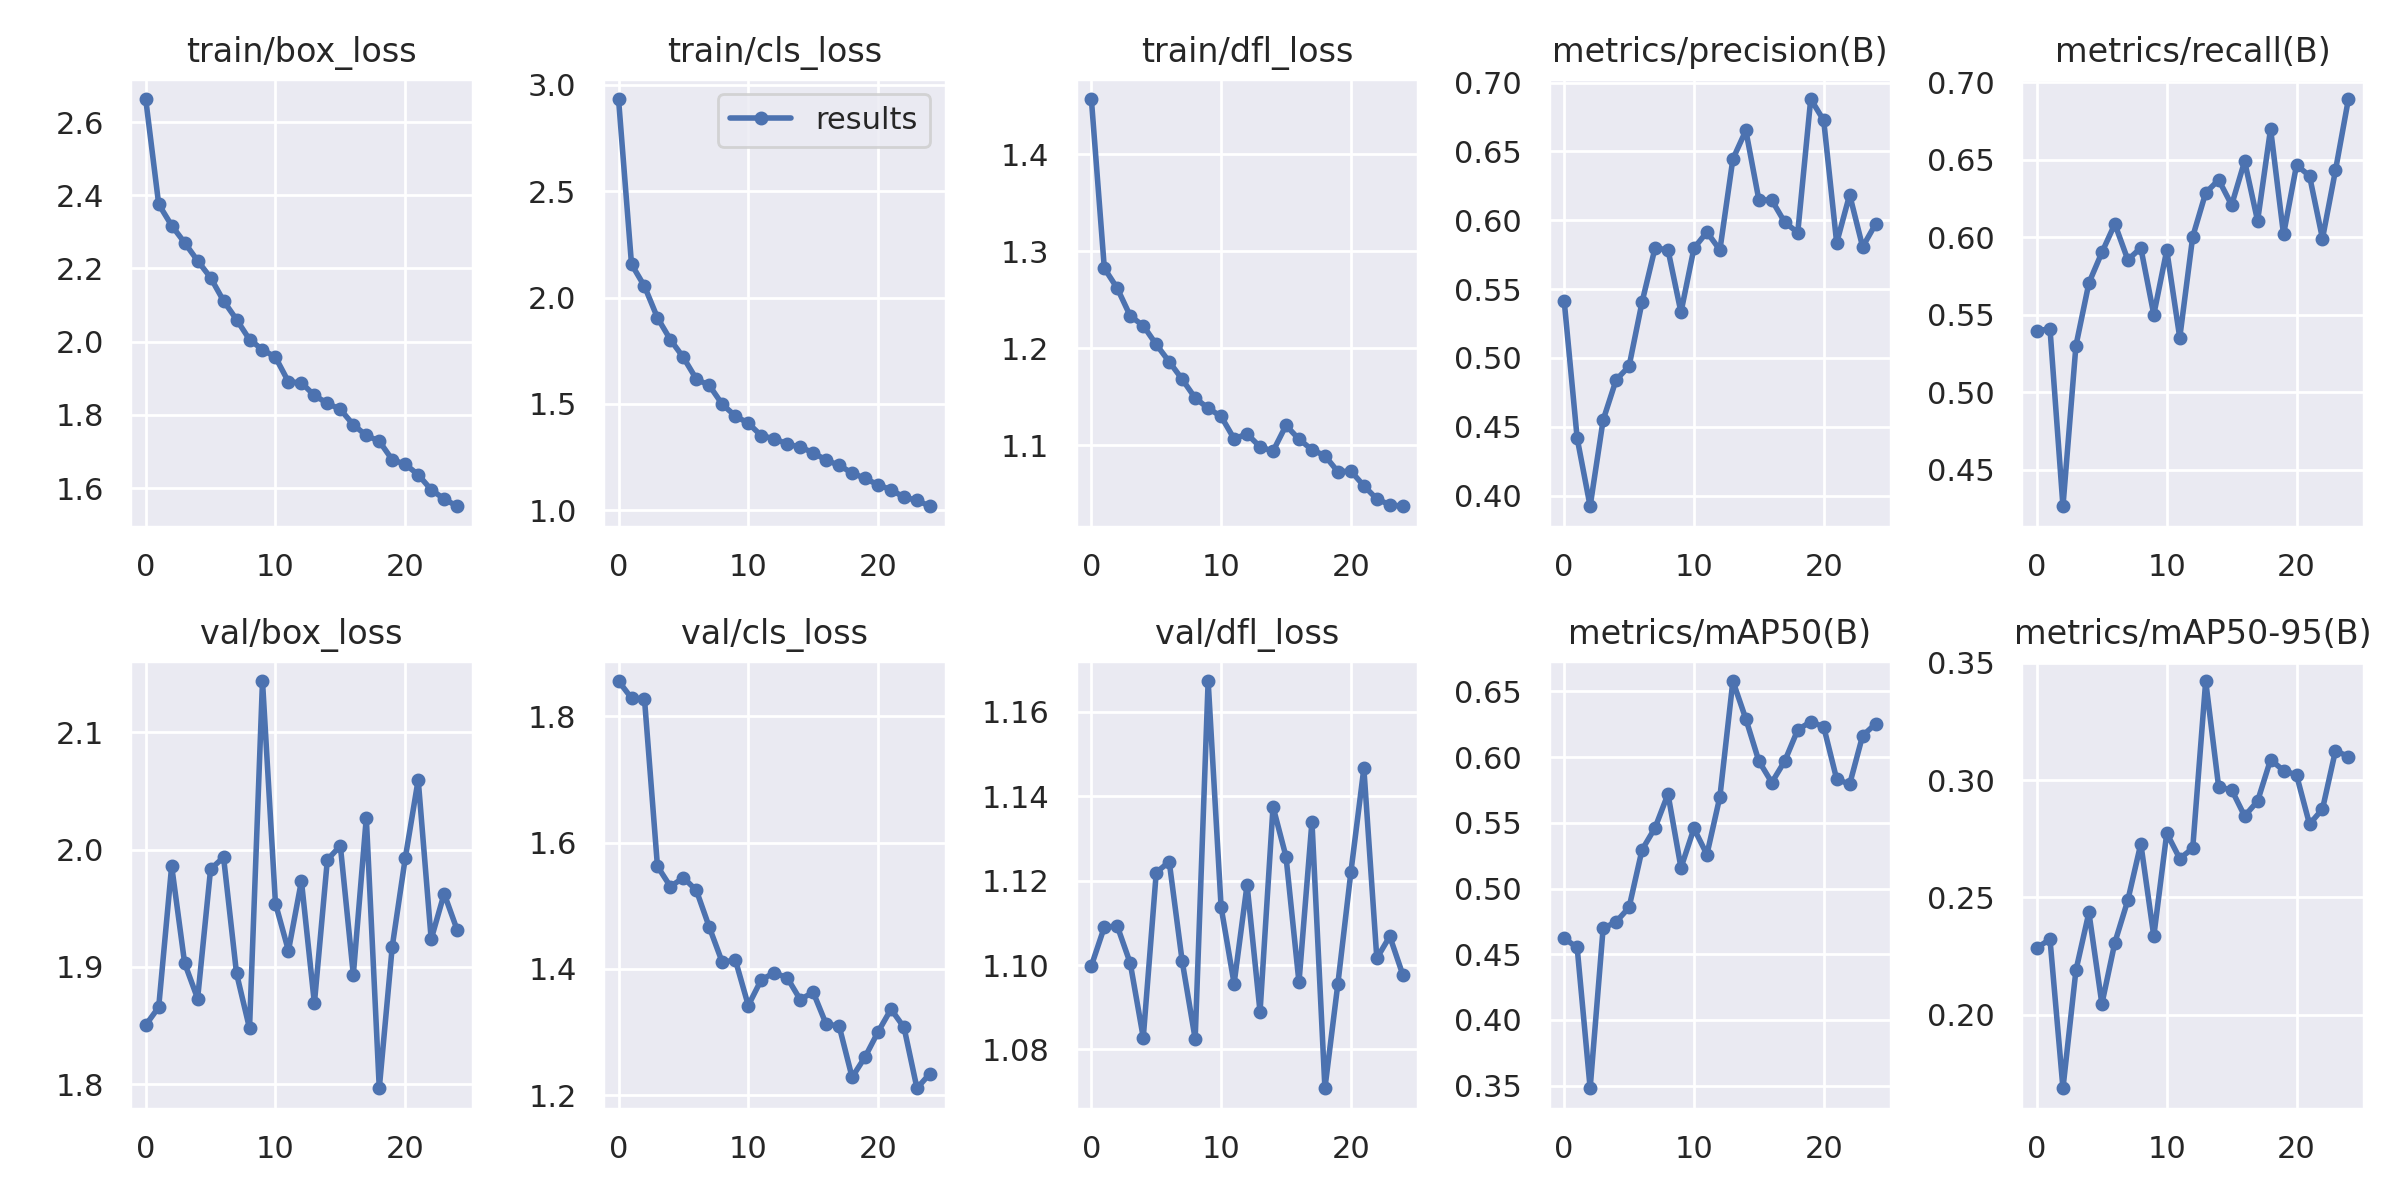

In [3]:
from IPython.display import Image

# Replace 'your_image_path.jpg' with the actual path to your image file
image_path = './images/y8_results.png'

# Display the image
Image(filename=image_path)

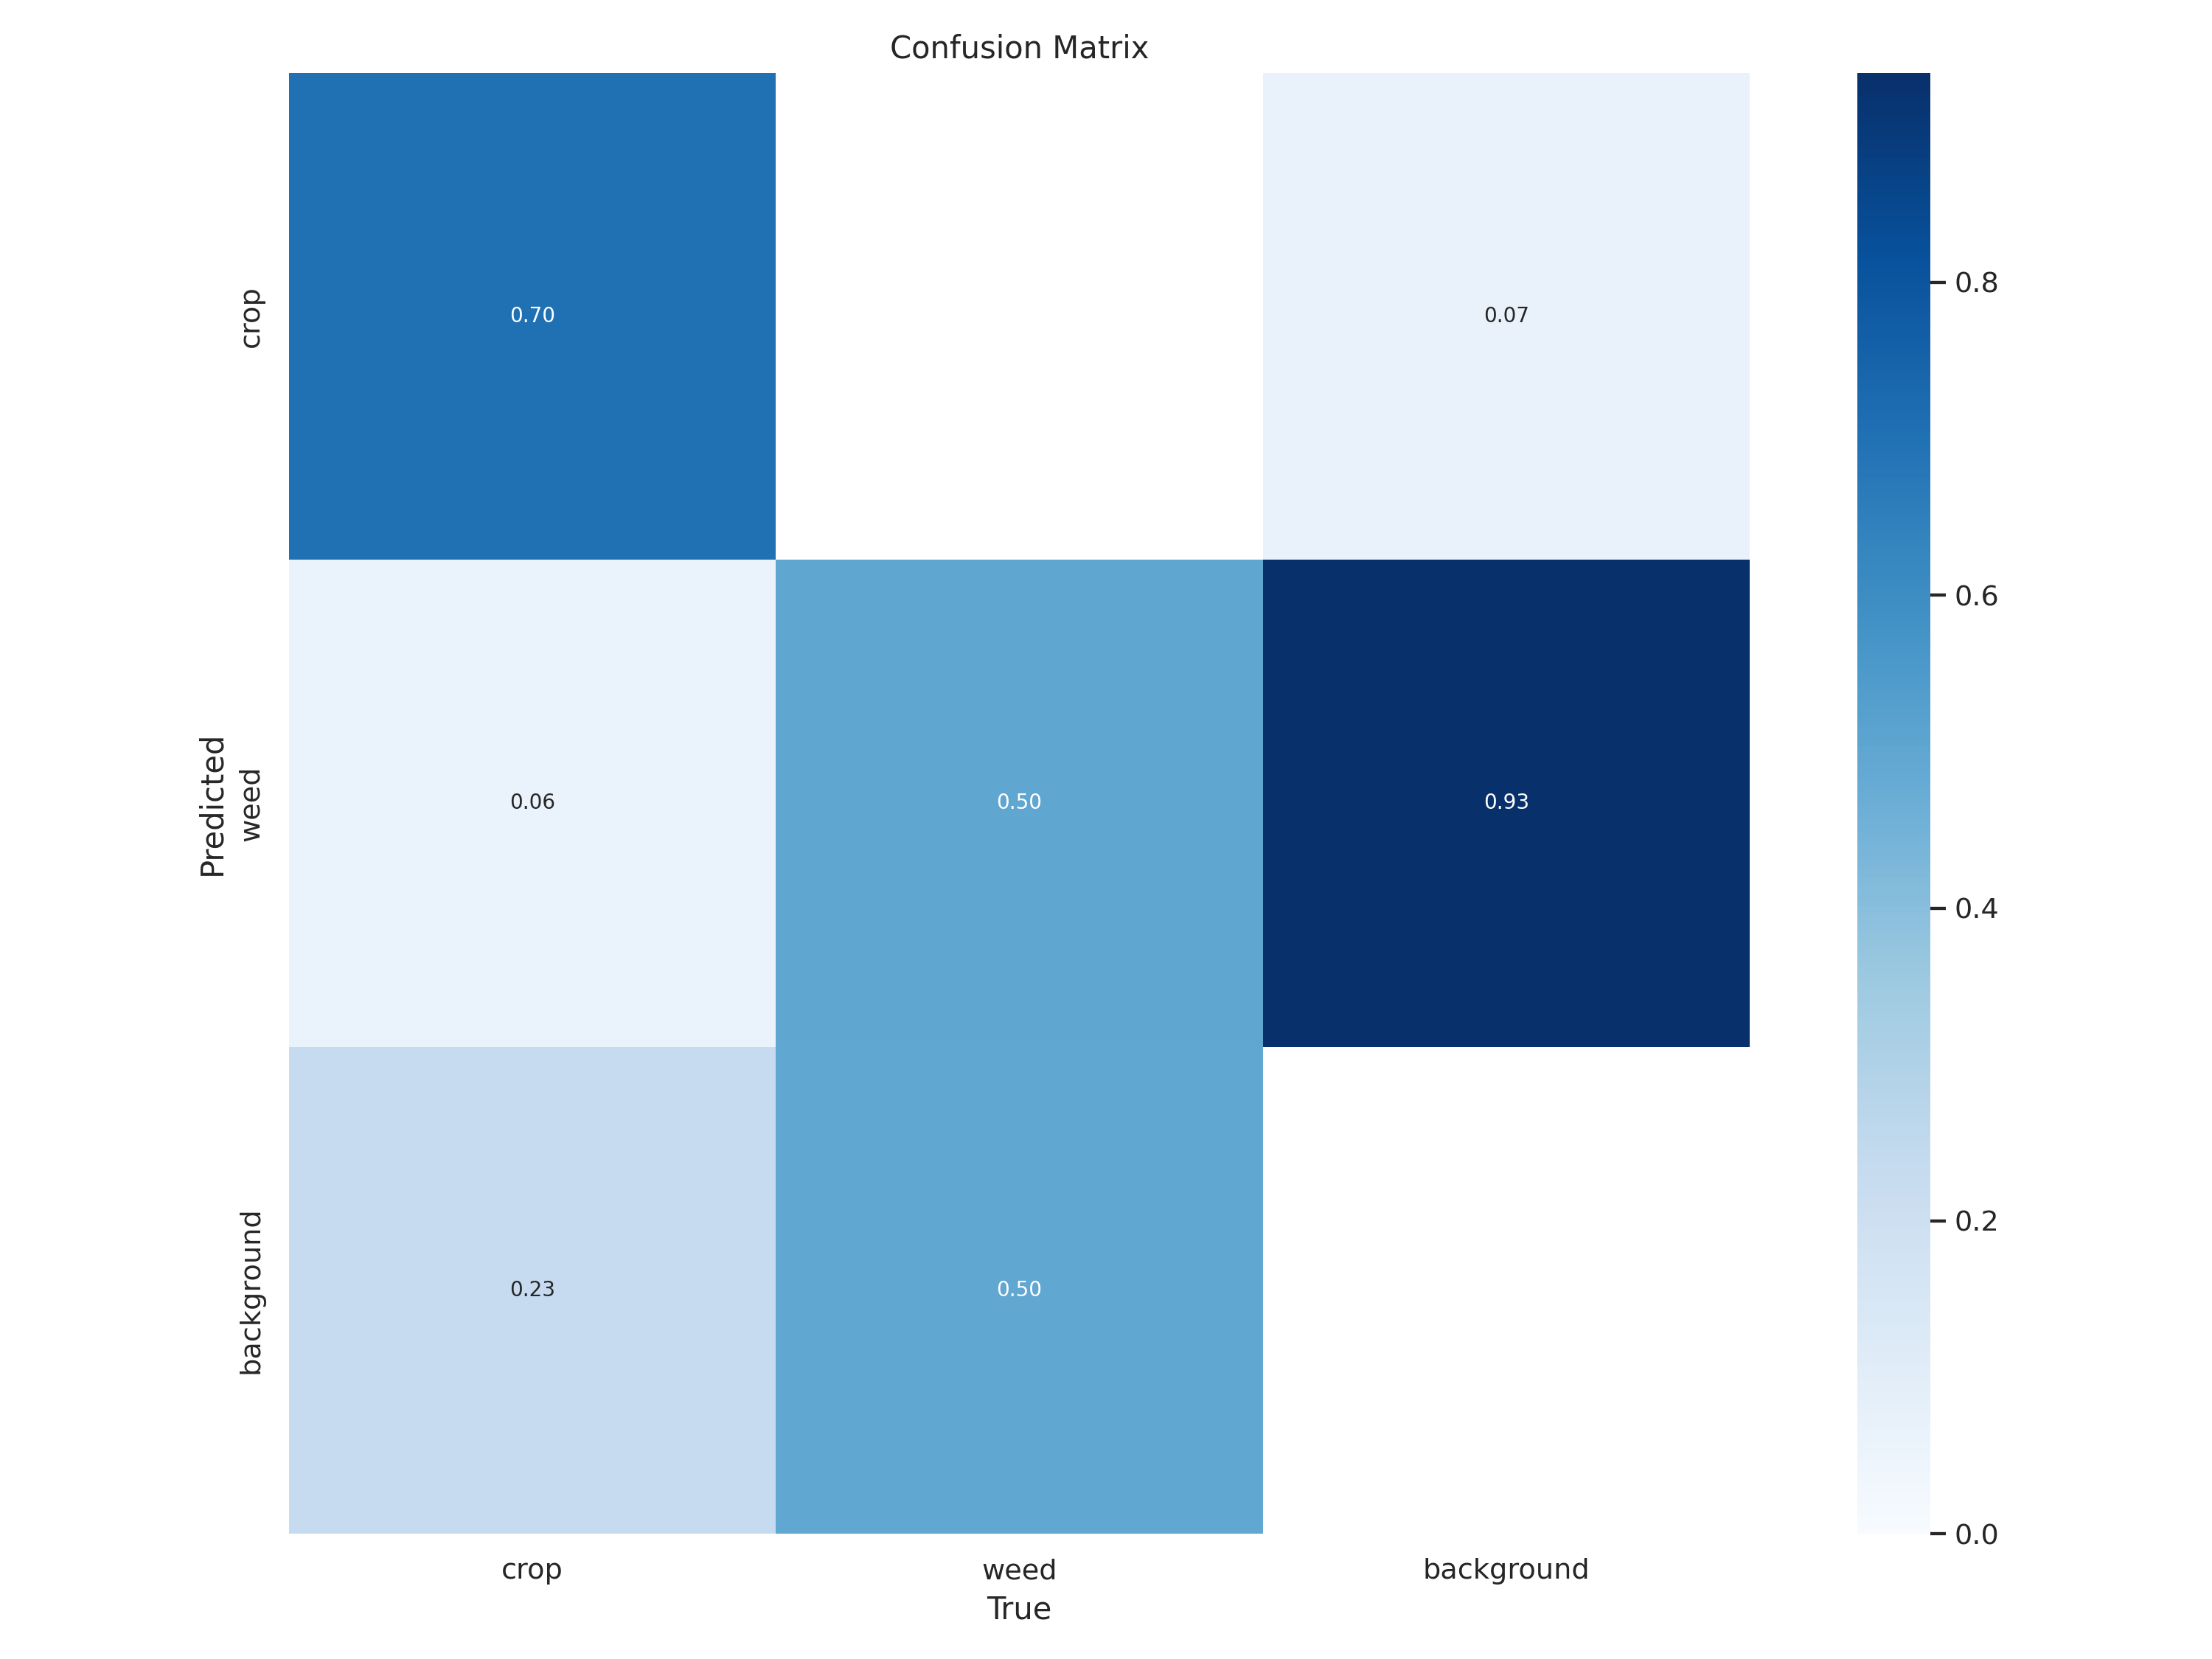

In [6]:
#Confusion matrix
image3 = './images/y8_confusion_matrix.png'
Image(filename=image3, width=800)

### Validation set results

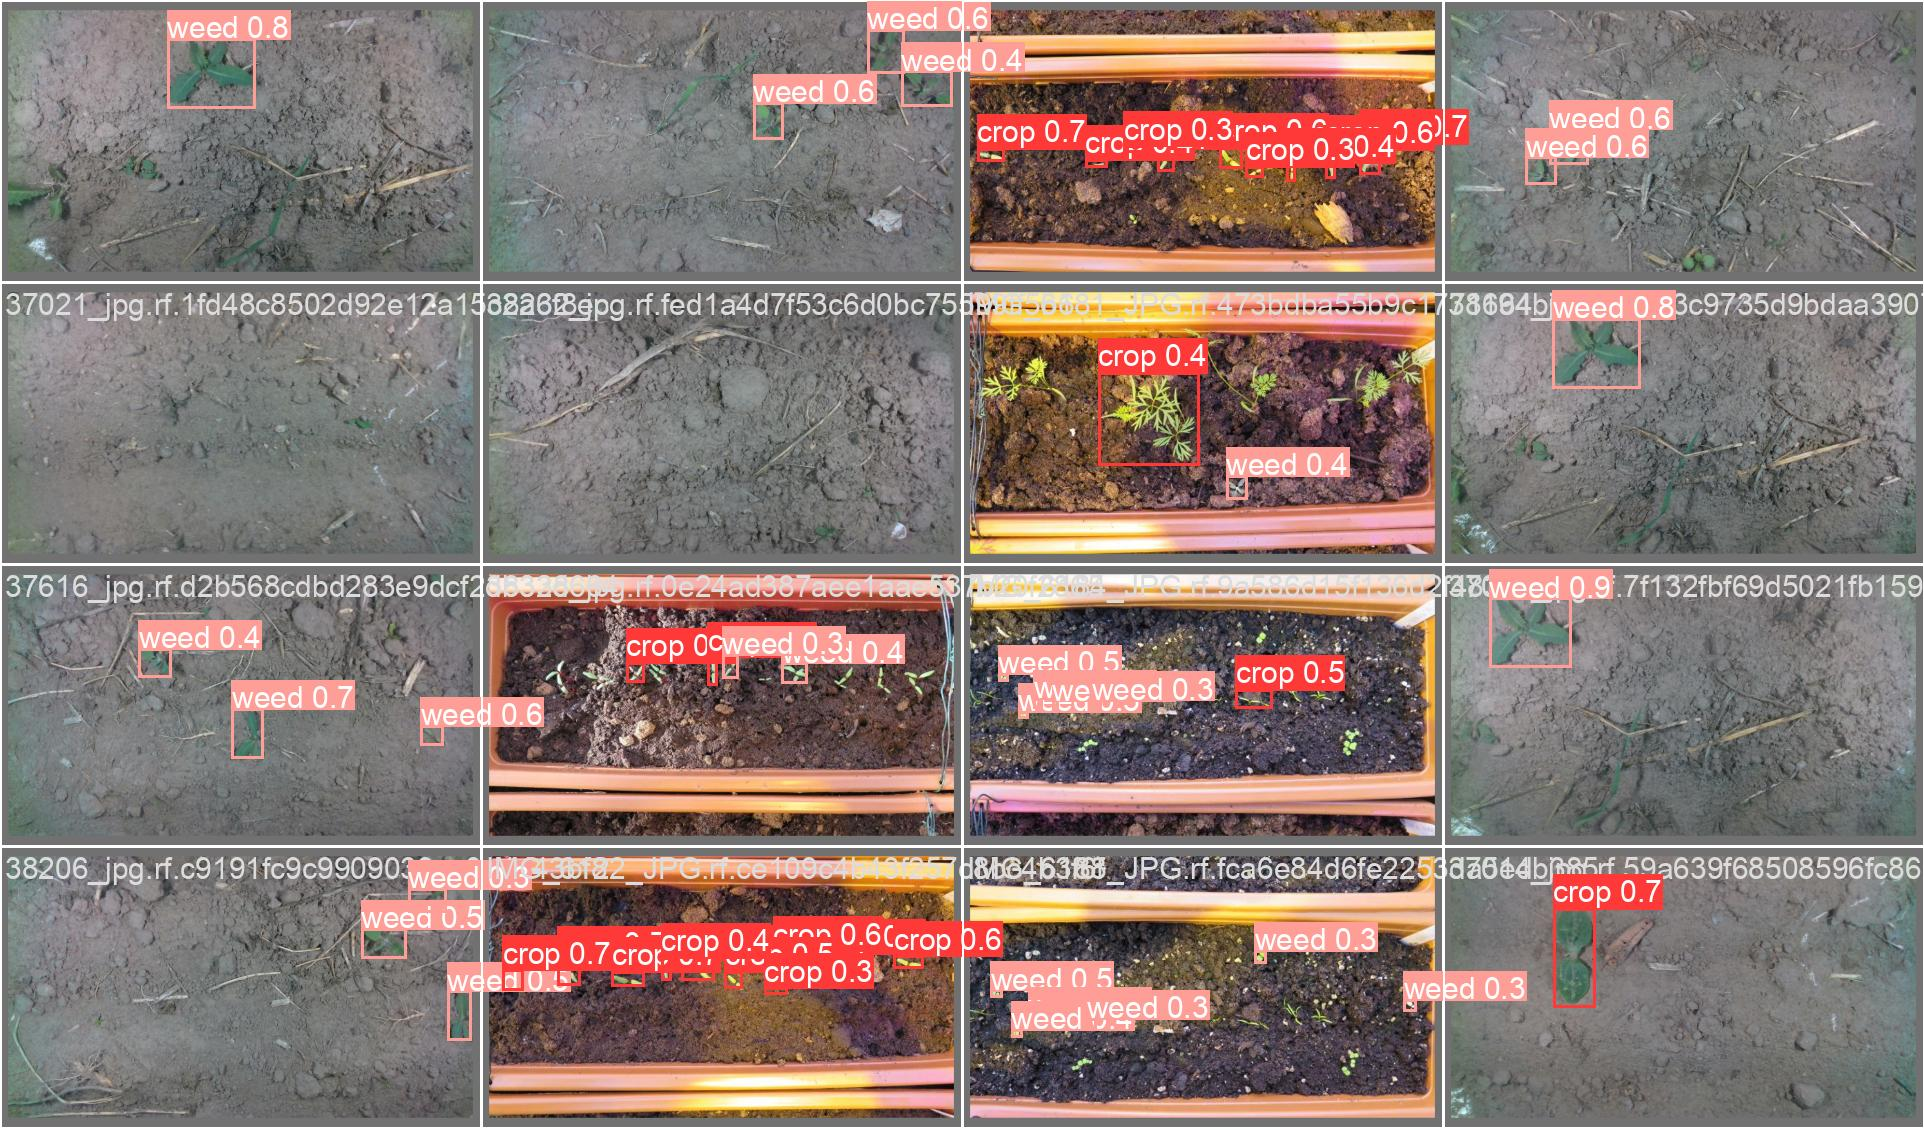

In [8]:
image1 = './images/y8_val_batch1_pred.jpg'
image2 = './images/y8_val_batch2_pred.jpg'

# Display the image
#Image(filename=image1)
Image(filename=image2)

## Inference with Custom Model

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=WeedCrop/test/images

2024-01-19 16:17:28.776139: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-19 16:17:28.776195: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-19 16:17:28.777485: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-19 16:17:29.785510: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/118 /content/drive/MyDrive/yolo/WeedCrop/test/images/12122_jpg.rf